In [42]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, QuantumCircuit
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu = QuantumCircuit(c, t, name="Controlled 13^x mod 35")

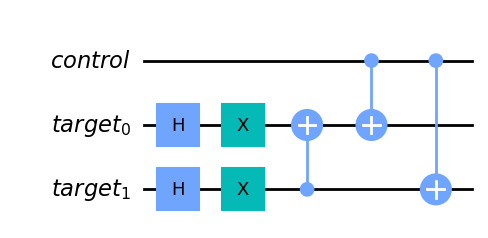

In [43]:
# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS- INICIO
cu.h(t[0])
cu.h(t[1])
cu.x(t[0])
cu.x(t[1]) 
cu.cx(t[1], t[0])

# Controlar el circuito
cu.cx(c, t)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS - FIN

cu.draw('mpl')

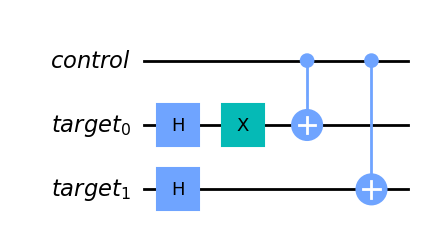

In [44]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu2 = QuantumCircuit(c, t)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS- INICIO
cu2.h(t[0]) 
cu2.h(t[1]) 
cu2.x(t[0]) 

cu2.cx(c, t)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS - FIN
   
cu2.draw('mpl')

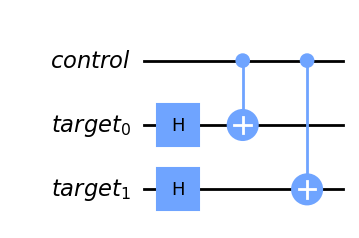

In [45]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu4 = QuantumCircuit(c, t)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS- INICIO
cu4.h(t[0])
cu4.h(t[1])
cu4.cx(c, t)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS - FIN

cu4.draw('mpl')

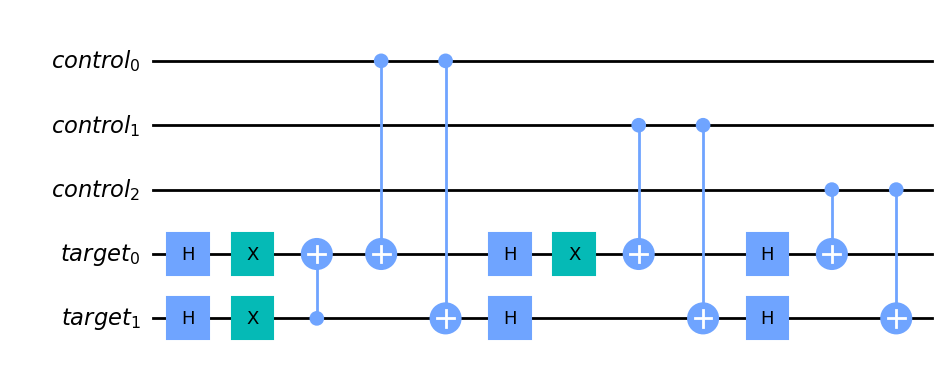

In [46]:
cqr = QuantumRegister(3, 'control')
tqr = QuantumRegister(2, 'target')
cux = QuantumCircuit(cqr, tqr)
solutions = [cu, cu2, cu4]
for i in range(3):
    cux = cux.compose(solutions[i], [cqr[i], tqr[0], tqr[1]])
cux.draw('mpl')

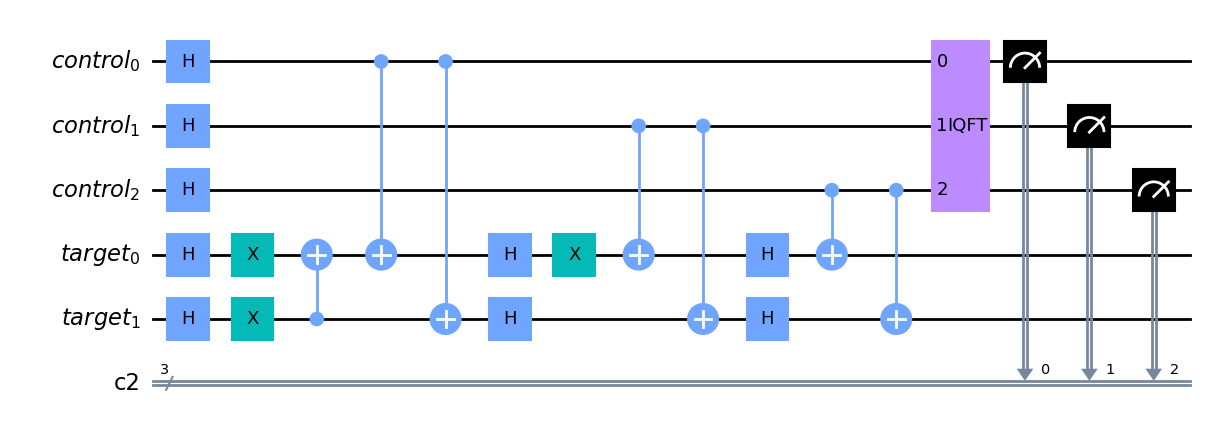

In [47]:
from qiskit.circuit.library import QFT
from qiskit import ClassicalRegister
# Crea un objeto tipo circuito
cr = ClassicalRegister(3)
shor_circuit = QuantumCircuit(cqr, tqr, cr)

# Prepara los cúbits
shor_circuit.h(cqr)

# Añade tu circuito
shor_circuit = shor_circuit.compose(cux)

# Calcula la transformada cuántica de Fourier inversa y extrae la salida
shor_circuit.append(QFT(3, inverse=True), cqr)
shor_circuit.measure(cqr, cr)
shor_circuit.draw('mpl')

In [48]:
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram
qasm_sim = Aer.get_backend('aer_simulator')
tqc = transpile(shor_circuit, basis_gates=['u', 'cx'], optimization_level=3)
print(f"profundidad del circuito: {tqc.depth()}")
print(f"el circuito contiene {tqc.count_ops()['cx']} CNOTs")

profundidad del circuito: 25
el circuito contiene 16 CNOTs


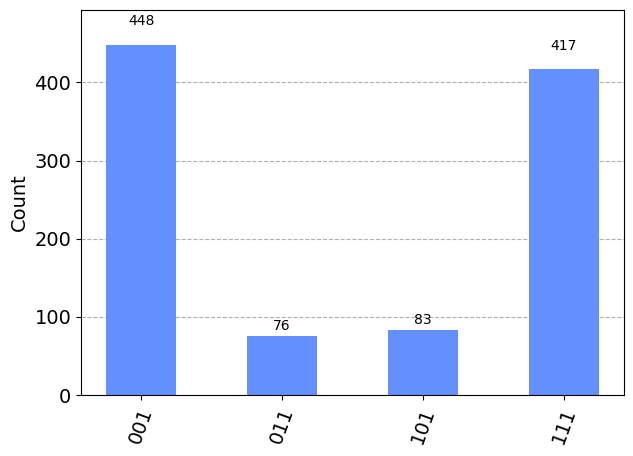

In [55]:
counts = qasm_sim.run(tqc).result().get_counts()
plot_histogram(counts)

In [50]:
from fractions import Fraction
n = 3  # n es el número de cúbits en el registro de conteo
# Bucle sobre cada valor de la medida
for measurement in counts.keys():
    # Convierte el código binario tipo string en 'int', y divide por 2^n
    decimal = int(measurement, 2)/2**n
    # Usando el algoritmos de fracciones continuas lo convertimos en la forma a/b
    print(Fraction(decimal).limit_denominator())

1/8
7/8
3/8
5/8


In [56]:
13**4 % 35

1

In [52]:
from math import gcd # máximo común divisor
for x in [-1, 1]:
    print(f"Valor estimado: {gcd(13**(4//2)+x, 35)}")

Valor estimado: 7
Valor estimado: 5
